# Machine Learning Project: Regression. Template By
Simon Denman (s.denman@qut.edu.au)

# Project complete by
Mohan Hao (imhaom@gmail.com)
## Overview

Project 1: Regression
Dataset: US Census socio-economic data predicting violent crimes per capita.

Tasks:

Train Linear, Ridge, and LASSO regression models.

Use validation set to tune λ for Ridge/LASSO.

Evaluate on test set.

Response Must Include:

Pre-processing discussion (e.g., standardization)

Model details and λ values

Model comparison (accuracy, complexity, validity, socio-economic impact)

Ethical considerations in socio-economic modeling

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [1]:
# import all the important packages

# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn, because of excellent heatmaps
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
import statsmodels
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# can also use sklearn for our regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools


In [2]:
# load data
train = pd.read_csv('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q1/communities_train.csv')
val = pd.read_csv('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q1/communities_val.csv')
test = pd.read_csv('/home/imhaom/CAB420_Machine_Learning/Assignment 1A/Q1/communities_test.csv')

# Pull out X and y components of the data
# if you want to convert this data to numpy format, you can add .to_numpy() to the end of each row below
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]
X_val = val.iloc[:,0:-1]
y_val = val.iloc[:,-1]
X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

(298, 101)
(298, 101)
(299, 101)


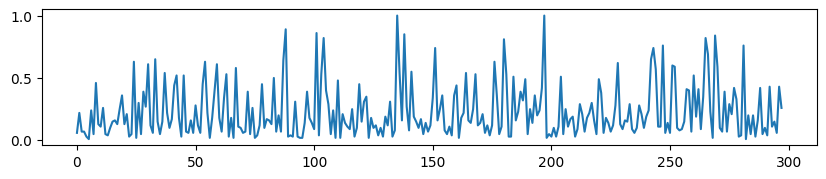

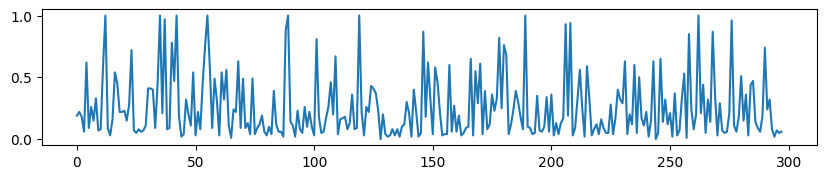

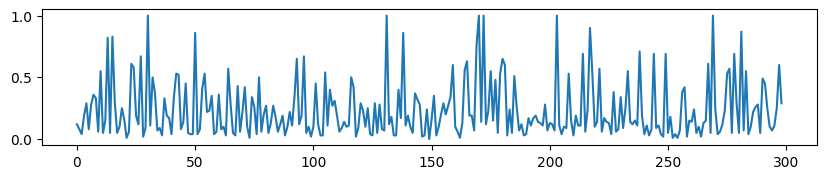

In [3]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing

print(train.shape)
print(val.shape)
print(test.shape)

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(3, 1, 1)
ax.plot(train[' ViolentCrimesPerPop '])

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(3, 1, 2)
ax.plot(val[' ViolentCrimesPerPop '])

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(3, 1, 3)
ax.plot(test[' ViolentCrimesPerPop '])


                              OLS Regression Results                             
Dep. Variable:      ViolentCrimesPerPop    R-squared:                       0.759
Model:                               OLS   Adj. R-squared:                  0.637
Method:                    Least Squares   F-statistic:                     6.207
Date:                   Sat, 12 Apr 2025   Prob (F-statistic):           7.72e-28
Time:                           14:04:49   Log-Likelihood:                 251.07
No. Observations:                    298   AIC:                            -300.1
Df Residuals:                        197   BIC:                             73.27
Df Model:                            100                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

/home/imhaom/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/imhaom/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: >

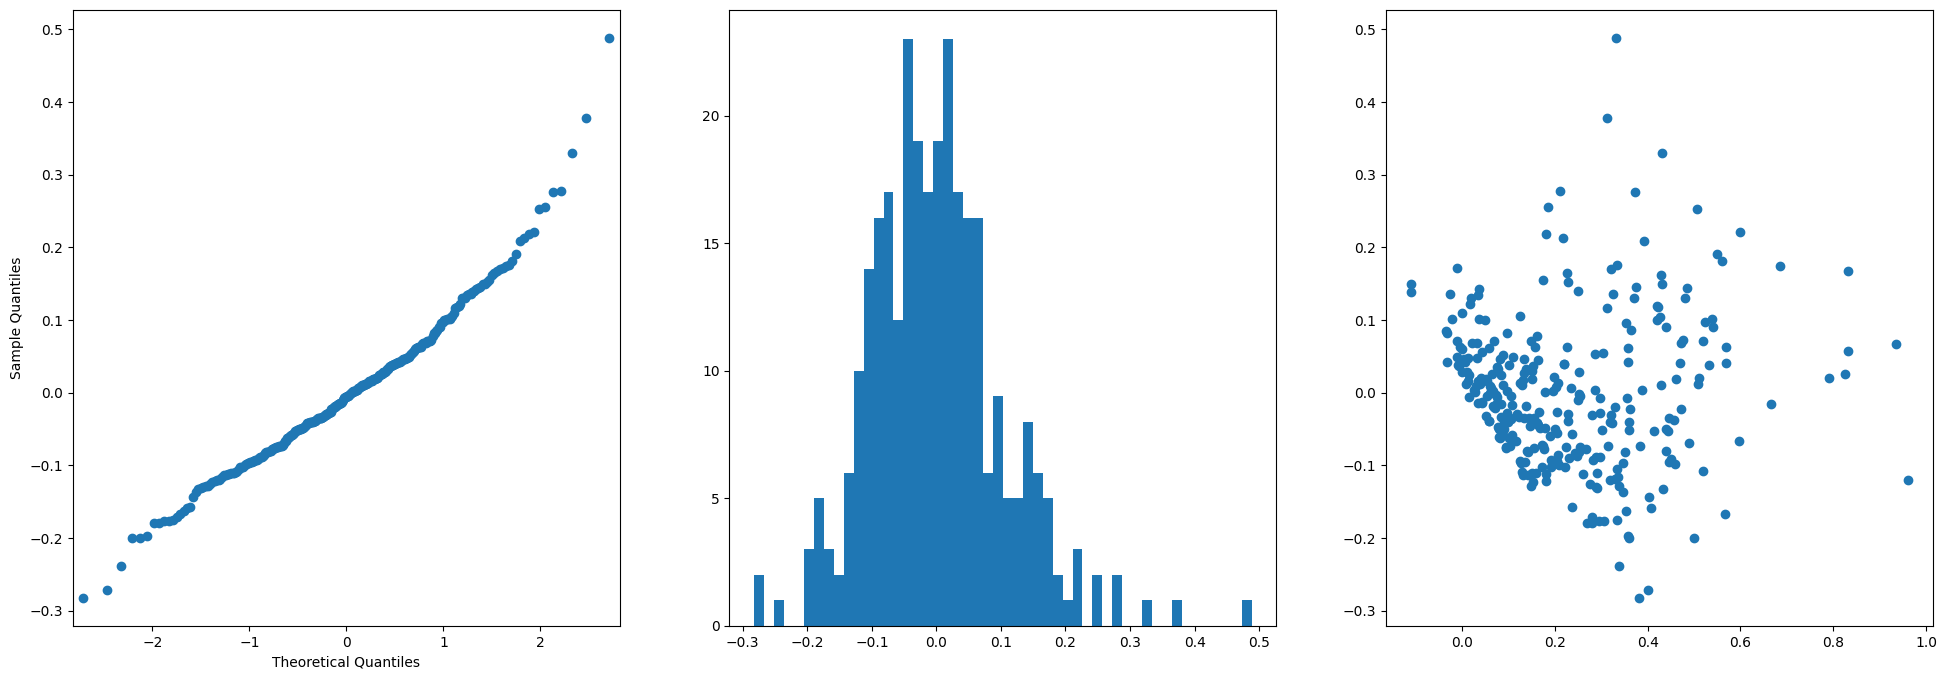

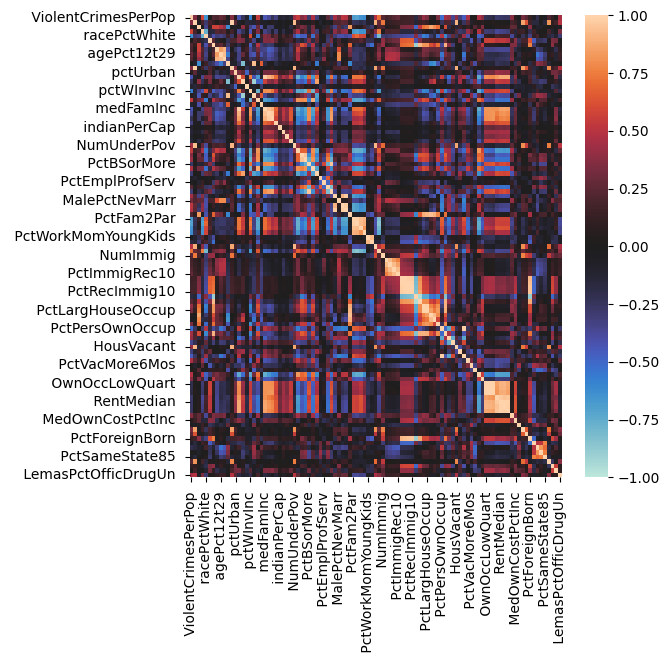

In [4]:
# train your Linear Regression model here. Data has already been split into predictors (X_train, X_val and X_test) and the
# desired response (y_train, y_val and y_test above).
#
# Note that you DO NOT NEED to remove any variables, or add higher order terms. JUST USE THE DATA AS IS.

# Once you've trained the model, evaluate it. This would include:
#  - Measuring the accuracy of the model (i.e. RMSE or similar measures)
#  - Looking at the properties of the fitted model, for example the R^2, and if all terms are contributing to the model
#  - Considering the validity of the trained model. This could include assumptions about independent predictors, and the 
#    distribution of the residuals
# Your write-up should include your findings regarding the above.

response = ' ViolentCrimesPerPop '
predictors = [X for X in train.columns if X != response]

X_train = sm.add_constant(X_train[predictors])
y_train = train[response]

X_val = sm.add_constant(X_val[predictors])
y_val = val[response]

X_test = sm.add_constant(X_test[predictors])
y_test = test[response]

# create the linear model
model = sm.OLS(y_train, X_train).fit()
model.summary = model.summary()

pred = model.predict(X_val)
print(model.summary)

print('Model_linear_Simple_RMSE = {}'.format(np.sqrt(mean_squared_error(y_val, model.predict(X_val)))))
print(model.params)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(rmse_train, rmse_test)

def plot_diagnostics(model, training_data):
    fig = plt.figure(figsize=[24, 8])
    ax = fig.add_subplot(1, 3, 1)    
    f = statsmodels.api.qqplot(model.resid, ax=ax)

    ax = fig.add_subplot(1, 3, 2)
    ax.hist(model.resid, 50)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(model.predict(training_data), model.resid)
    
plot_diagnostics(model, X_train)

import seaborn
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(1, 1, 1)
seaborn.heatmap(train[[response] + predictors].corr(), ax=ax, vmin=-1.0, vmax=1.0, cmap=seaborn.color_palette("icefire", as_cmap=True))

In [5]:
def standardise(data, mu = None, sigma = None):
  """ Standardise/Normalise data to have zero mean and unit variance

  Args:
    data (np.array):
      data we want to standardise (usually covariates)

    Returns:
      Standardised data, mean of data, standard deviation of data
  """
  if (mu is None):
    mu = np.mean(data, axis=0)
  if (sigma is None):
    sigma = np.std(data, axis=0)
  
  scaled = (data - mu) / sigma
  return scaled, mu, sigma

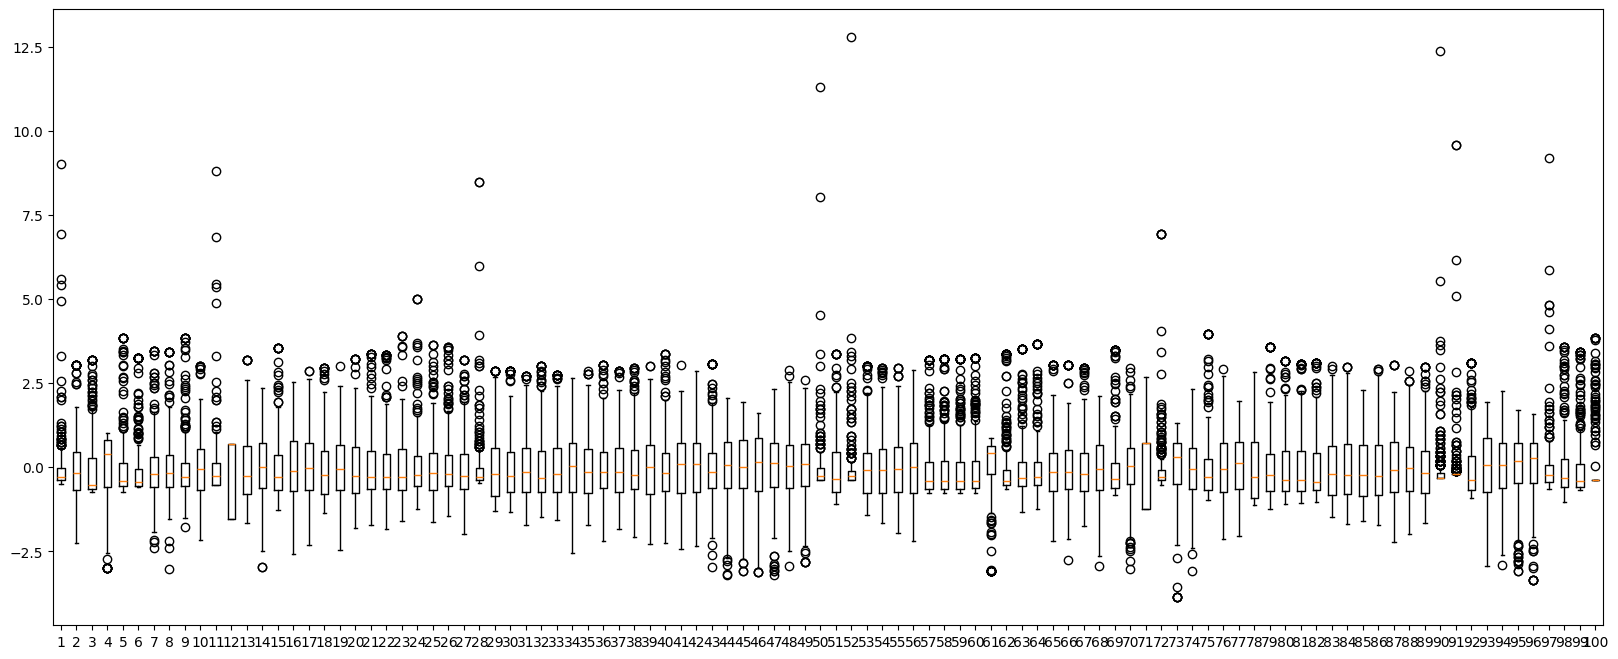

In [6]:
# train your regularised models (ridge and lasso). Here you will use the same data as you used in for the above regression model
#
# One key consideration with your regularised models is the selection of lambda (i.e. the strength of the regularisation). A suggested 
# starting point for finding your value of lambda is suggested below using numpy.logspace (see 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). The code below will give you 50 values starting at 10-10 and 
# finishing at 1, spread on a log scale. Just note that for plotting things that result from this, you may want to change the scale of 
# your x-axis to a log scale (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)
#
# Note that the below list of lambda is going to be fairly coarse. For the sake of speed, we suggest that you avoid evaluating a huge
# number of lambdas in one pass, but you can get a more precise estimate by refining your estimate over multiple passes (i.e. if your
# initial estimate if 0.1, you could run the search again now looking over a range of [0.01 .. 1.0] or similar).
#
# remember that lambda is a keyword in python, so we're calling the array below alphas
#
alphas = np.logspace(-10, 0)

# Once you've found your ridge and lasso models, evaluate them, following the approach you've used for the linear method, and compare the
# three models.

# Standardize original training data
X_train_std, X_mu, X_sigma = standardise(X_train)
X_val_std, _, _ = standardise(X_val, X_mu, X_sigma)
X_test_std, _, _ = standardise(X_test, X_mu, X_sigma)

y_train_std, y_mu, y_sigma = standardise(y_train)
y_val_std, _, _ = standardise(y_val, y_mu, y_sigma)
y_test_std, _, _ = standardise(y_test, y_mu, y_sigma)

X_train_std = np.delete(X_train_std, 0, 1)
X_val_std = np.delete(X_val_std, 0, 1)
X_test_std = np.delete(X_test_std, 0, 1)

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train_std)
plt.show()

In [7]:
def plot_diagnoistics(trained_model, resid, X_train, y_train, X_val, y_val, X_test, y_test, y_mu = 0, y_sigma = 1):

    # undo standardisation, multiply by sigma, add mu
    y_train_pred = trained_model.predict(X_train)*y_sigma + y_mu
    y_val_pred = trained_model.predict(X_val)*y_sigma + y_mu
    y_test_pred = trained_model.predict(X_test)*y_sigma + y_mu
    
    # undo standardisation for testing data
    y_train_scaled = y_train*y_sigma + y_mu
    y_val_scaled = y_val*y_sigma + y_mu
    y_test_scaled = y_test*y_sigma + y_mu

    fig = plt.figure(figsize=[24, 8])
    ax = fig.add_subplot(1, 3, 1)
    f = sm.qqplot(resid, ax=ax)
    ax.set_title('QQ-Plot')    
    
    ax = fig.add_subplot(1, 3, 2)
    ax.hist(resid, 50)
    ax.set_xlabel('Residual Value')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Residuals')    

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(y_train_pred, resid)
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Residuals')
    ax.set_title('Predictions vs Residuals')

    rmse_train = np.sqrt(np.mean((y_train_pred - y_train_scaled)**2))
    rmse_val = np.sqrt(np.mean((y_val_pred - y_val_scaled)**2))
    rmse_test = np.sqrt(np.mean((y_test_pred - y_test_scaled)**2))

    fig = plt.figure(figsize=[16, 5])
    ax = fig.add_subplot(1, 3, 1)
    ax.scatter(y_train_scaled, y_train_pred)
    v = int(np.min([np.max(y_train_scaled), np.max(y_train_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title(rmse_train)

    ax = fig.add_subplot(1, 3, 2)
    ax.scatter(y_val_scaled, y_val_pred)
    v = int(np.min([np.max(y_val_scaled), np.max(y_val_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title(rmse_val)

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(y_test_scaled, y_test_pred)
    v = int(np.min([np.max(y_test_scaled), np.max(y_test_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title(rmse_test)
    

    

In [8]:
def plot_rmses(alpha_list, rmse_train, rmse_validation, log_scale = True):
    fig = plt.figure(figsize=[10, 4])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alpha_list, rmse_train, label='Training RMSE')
    ax.plot(alpha_list, rmse_validation, label='Validation RMSE')
    if log_scale:
        ax.set_xscale('log')
    ax.legend()

def plot_coeff(alpha_list, coeffs, log_scale = True):
    fig = plt.figure(figsize=[10, 4])
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(alpha_list, coeffs);
    if log_scale:
        ax.set_xscale('log')
    
def find_alpha(alpha_list, X_train, y_train, X_val, y_val, ridge, plot_stuff = True):

    rmse_train = []
    rmse_validation = []
    coeffs = []
    
    if (ridge):
        L1_wt = 0.0
    else:
        L1_wt = 1.0
    
    for l in alpha_list:
        model = sm.OLS(y_train, X_train).fit_regularized(alpha=l, L1_wt=L1_wt)        
        coeffs.append(model.params)
        rmse_train.append(np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
        rmse_validation.append(np.sqrt(np.mean((model.predict(X_val) - y_val)**2)))
        
    if (plot_stuff):
        plot_rmses(alpha_list, rmse_train, rmse_validation, True)
        plot_coeff(alpha_list, coeffs, True)
    
    best_alpha_index = np.argmin(rmse_validation)
    return alpha_list[best_alpha_index], best_alpha_index

[1.00000000e-10 1.26185688e-10 1.59228279e-10 2.00923300e-10
 2.53536449e-10 3.19926714e-10 4.03701726e-10 5.09413801e-10
 6.42807312e-10 8.11130831e-10 1.02353102e-09 1.29154967e-09
 1.62975083e-09 2.05651231e-09 2.59502421e-09 3.27454916e-09
 4.13201240e-09 5.21400829e-09 6.57933225e-09 8.30217568e-09
 1.04761575e-08 1.32194115e-08 1.66810054e-08 2.10490414e-08
 2.65608778e-08 3.35160265e-08 4.22924287e-08 5.33669923e-08
 6.73415066e-08 8.49753436e-08 1.07226722e-07 1.35304777e-07
 1.70735265e-07 2.15443469e-07 2.71858824e-07 3.43046929e-07
 4.32876128e-07 5.46227722e-07 6.89261210e-07 8.69749003e-07
 1.09749877e-06 1.38488637e-06 1.74752840e-06 2.20513074e-06
 2.78255940e-06 3.51119173e-06 4.43062146e-06 5.59081018e-06
 7.05480231e-06 8.90215085e-06 1.12332403e-05 1.41747416e-05
 1.78864953e-05 2.25701972e-05 2.84803587e-05 3.59381366e-05
 4.53487851e-05 5.72236766e-05 7.22080902e-05 9.11162756e-05
 1.14975700e-04 1.45082878e-04 1.83073828e-04 2.31012970e-04
 2.91505306e-04 3.678379

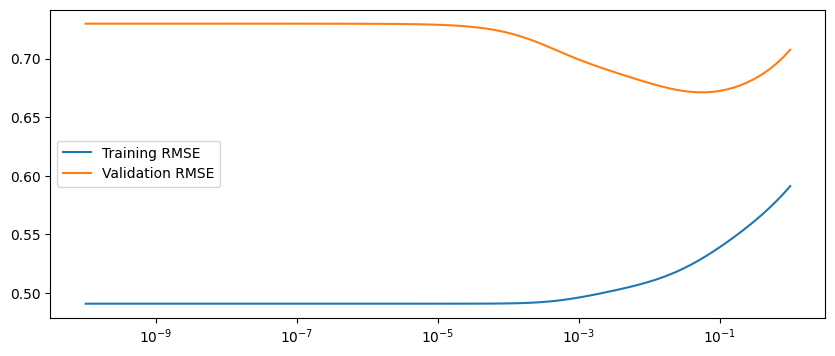

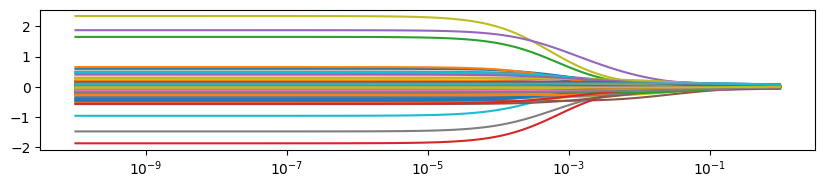

In [9]:
alpha_list = np.logspace(-10, 0, 100)
best_alpha, best_alpha_index = find_alpha(alpha_list, X_train_std, y_train_std, X_val_std, y_val_std, True, True)
print(alpha_list)
print(best_alpha)
print(best_alpha_index)


[0.04862602 0.05120535 0.05392151 0.05678175 0.0597937  0.06296542
 0.06630539 0.06982252 0.07352621 0.07742637]
0.056781747510650585
3


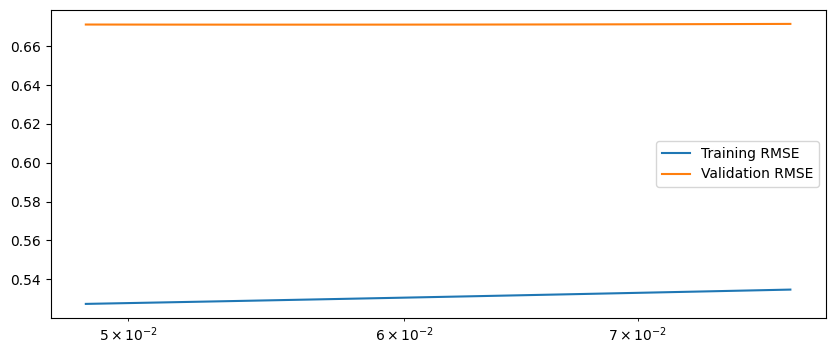

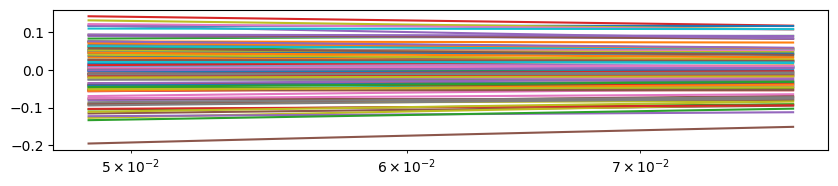

In [10]:
min_alpha = np.log10(alpha_list[best_alpha_index - 1])
max_alpha = np.log10(alpha_list[best_alpha_index + 1])
new_alpha = np.logspace(min_alpha, max_alpha, 10)
print(new_alpha)
best_alpha, best_alpha_index = find_alpha(new_alpha, X_train_std, y_train_std, X_val_std, y_val_std, True, True)
print(best_alpha)
print(best_alpha_index)

0.7194961704481223


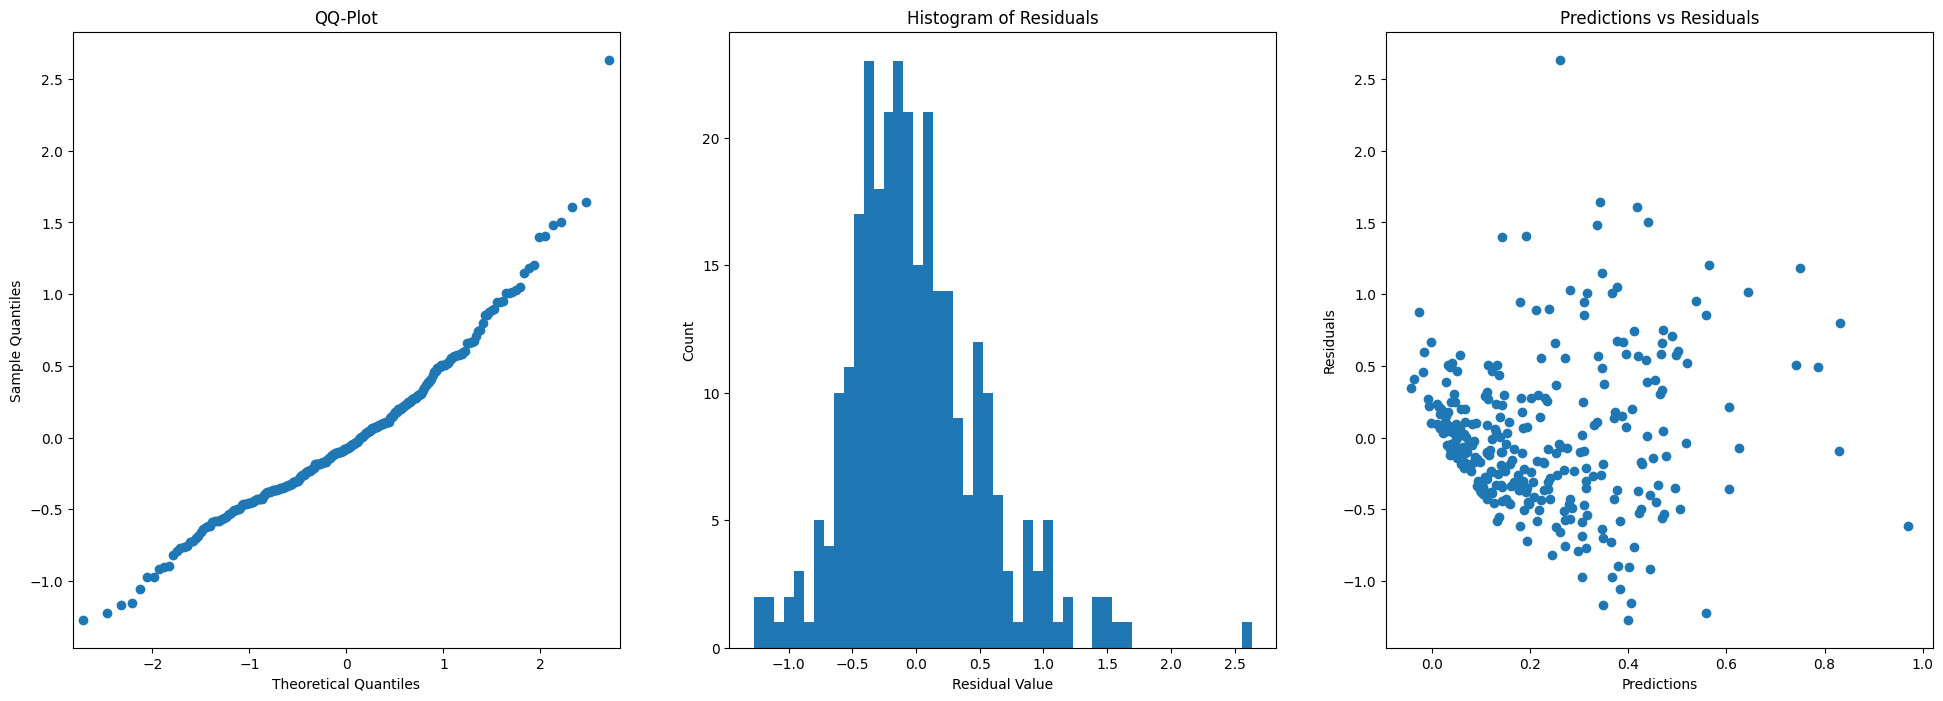

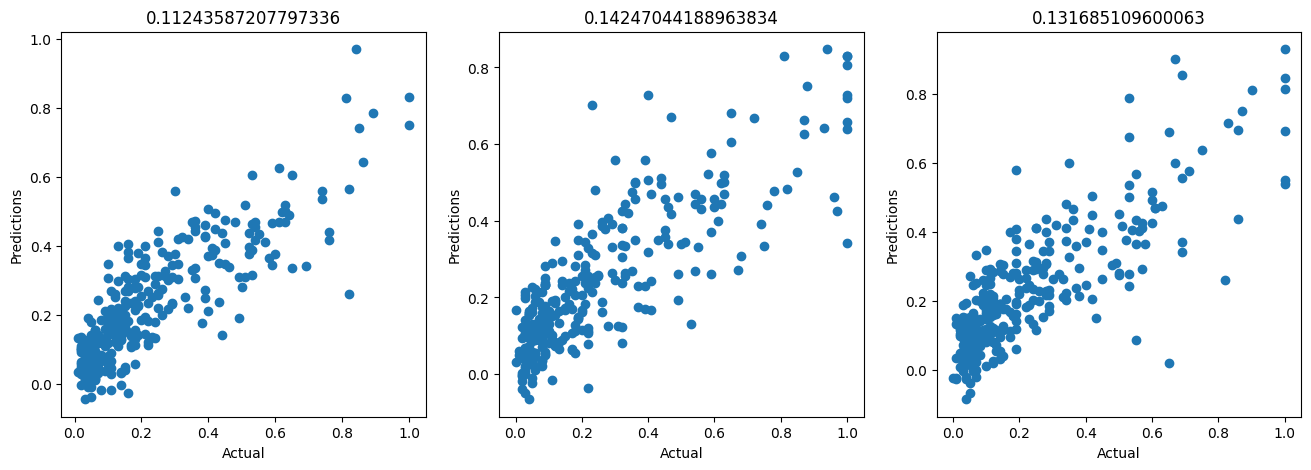

In [11]:
ridge_model = sm.OLS(y_train_std, X_train_std).fit_regularized(alpha=best_alpha, L1_wt=0.0)

plot_diagnoistics(ridge_model, y_train_std - ridge_model.predict(X_train_std), \
                  X_train_std, y_train_std, X_val_std, y_val_std, X_test_std, y_test_std, y_mu, y_sigma)

print(r2_score(y_train_std, ridge_model.predict(X_train_std)))

0.002364489412645407
73


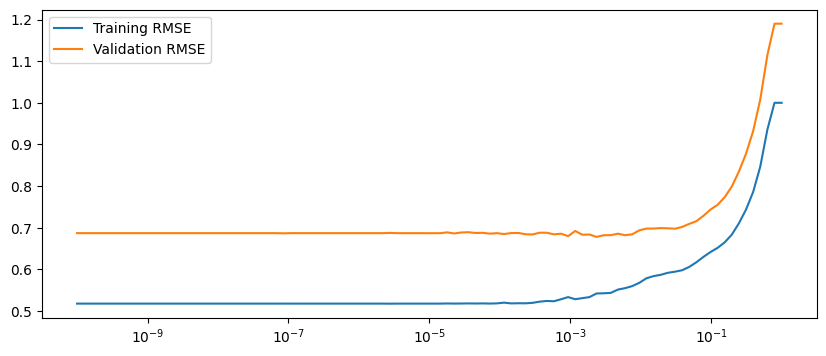

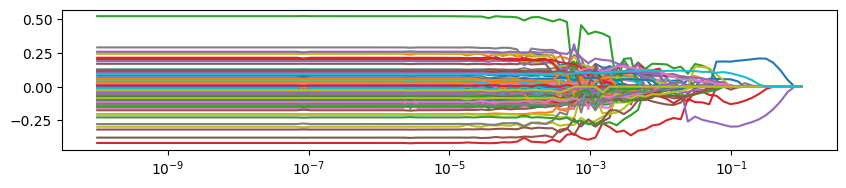

In [12]:
alpha_list = np.logspace(-10, 0, 100)
best_alpha, best_alpha_index = find_alpha(alpha_list, X_train_std, y_train_std, X_val_std, y_val_std, False, True)
print(best_alpha)
print(best_alpha_index)

[1.00000000e-10 1.26185688e-10 1.59228279e-10 2.00923300e-10
 2.53536449e-10 3.19926714e-10 4.03701726e-10 5.09413801e-10
 6.42807312e-10 8.11130831e-10 1.02353102e-09 1.29154967e-09
 1.62975083e-09 2.05651231e-09 2.59502421e-09 3.27454916e-09
 4.13201240e-09 5.21400829e-09 6.57933225e-09 8.30217568e-09
 1.04761575e-08 1.32194115e-08 1.66810054e-08 2.10490414e-08
 2.65608778e-08 3.35160265e-08 4.22924287e-08 5.33669923e-08
 6.73415066e-08 8.49753436e-08 1.07226722e-07 1.35304777e-07
 1.70735265e-07 2.15443469e-07 2.71858824e-07 3.43046929e-07
 4.32876128e-07 5.46227722e-07 6.89261210e-07 8.69749003e-07
 1.09749877e-06 1.38488637e-06 1.74752840e-06 2.20513074e-06
 2.78255940e-06 3.51119173e-06 4.43062146e-06 5.59081018e-06
 7.05480231e-06 8.90215085e-06 1.12332403e-05 1.41747416e-05
 1.78864953e-05 2.25701972e-05 2.84803587e-05 3.59381366e-05
 4.53487851e-05 5.72236766e-05 7.22080902e-05 9.11162756e-05
 1.14975700e-04 1.45082878e-04 1.83073828e-04 2.31012970e-04
 2.91505306e-04 3.678379

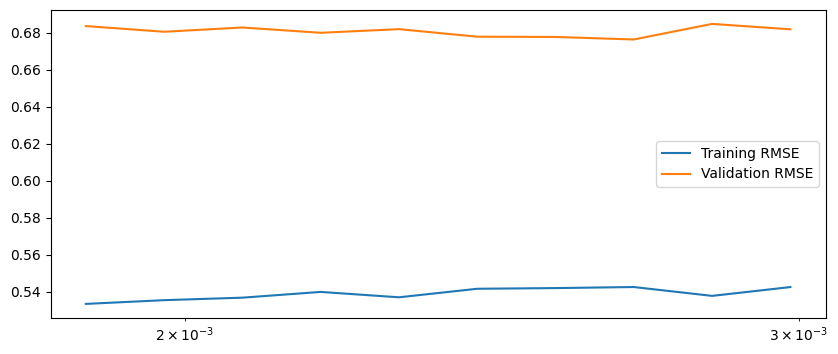

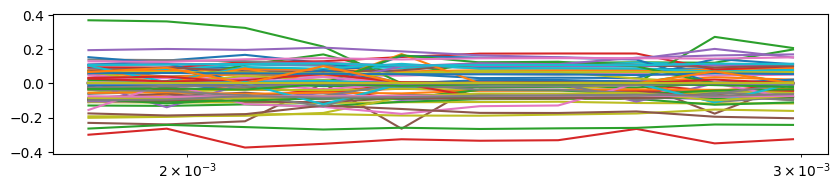

In [13]:
print(alpha_list)
min_alpha = np.log10(alpha_list[best_alpha_index - 1])
max_alpha = np.log10(alpha_list[best_alpha_index + 1])
new_alpha = np.logspace(min_alpha, max_alpha, 10)
print(new_alpha)
best_alpha, best_alpha_index = find_alpha(new_alpha, X_train_std, y_train_std, X_val_std, y_val_std, False, True)
print(best_alpha)
print(best_alpha_index)

0.7057678377112067


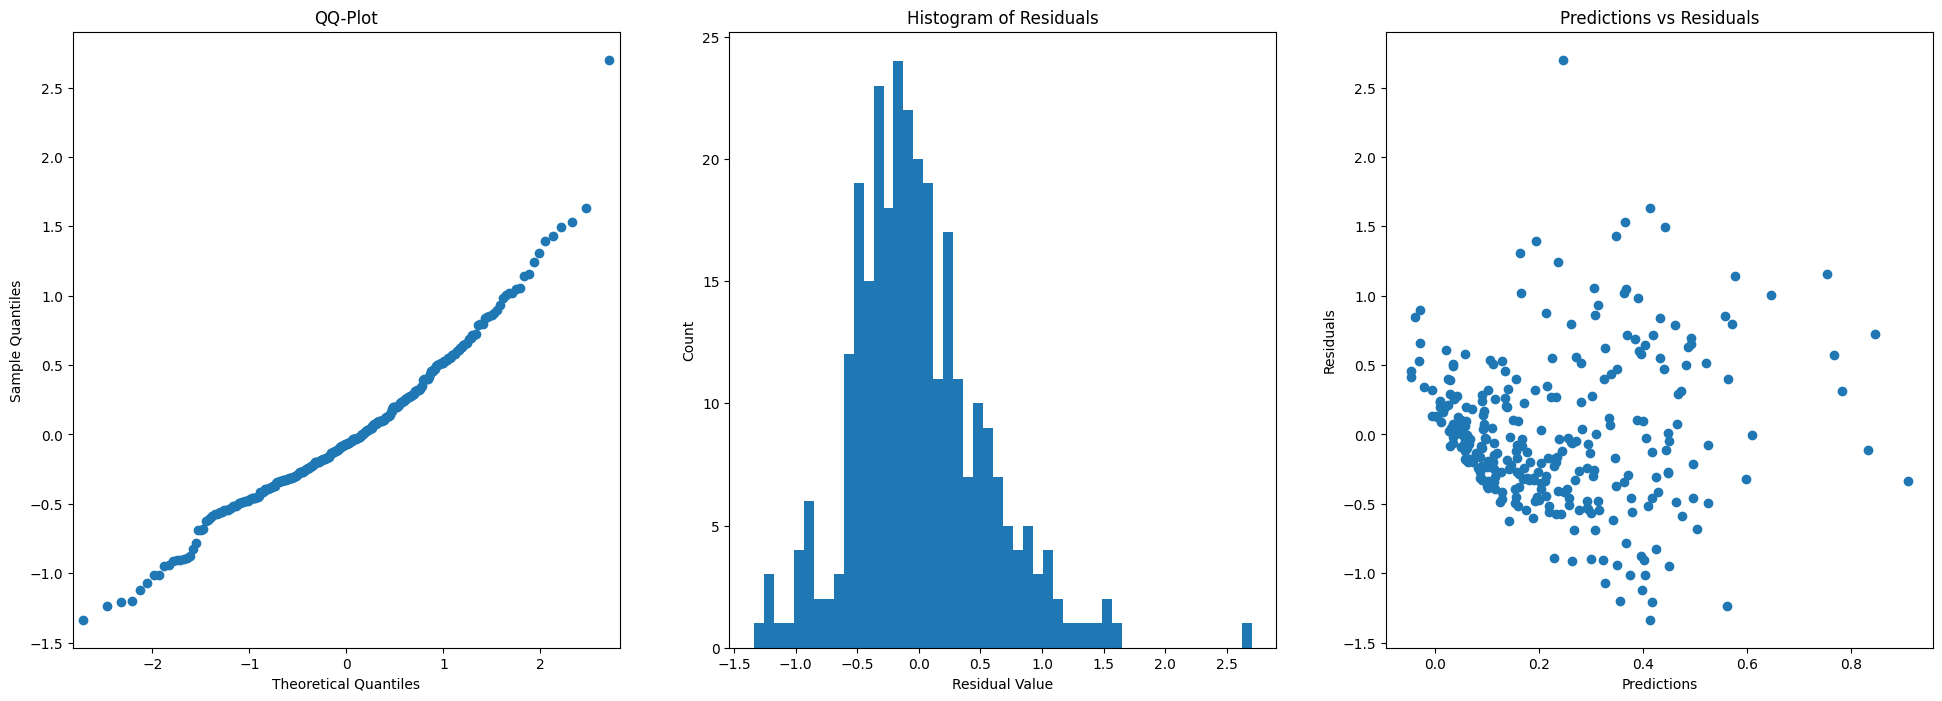

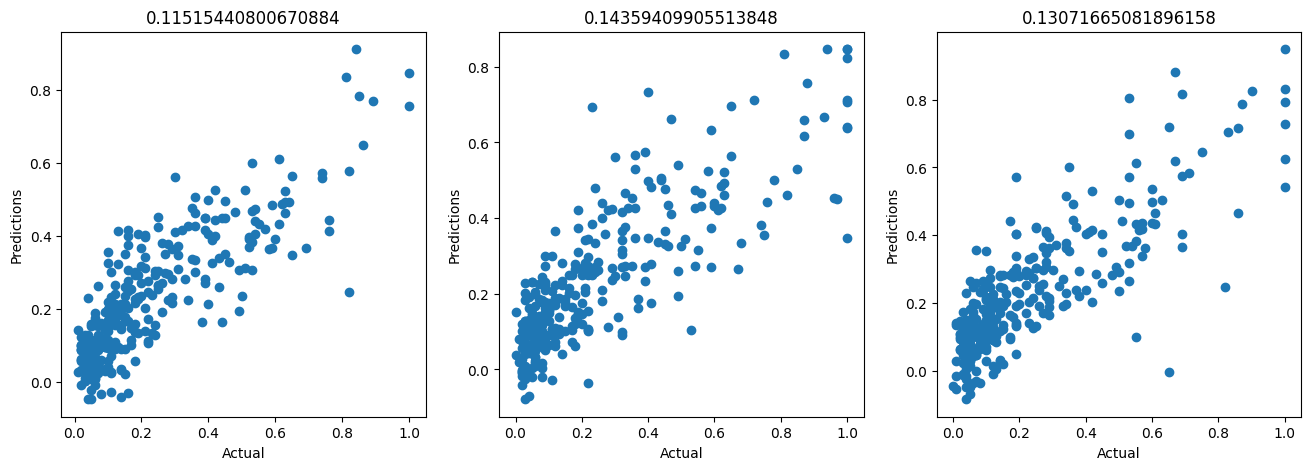

In [14]:
lasso_model = sm.OLS(y_train_std, X_train_std).fit_regularized(alpha=best_alpha, L1_wt=1.0)

plot_diagnoistics(lasso_model, y_train_std - lasso_model.predict(X_train_std), \
                  X_train_std, y_train_std, X_val_std, y_val_std, X_test_std, y_test_std, y_mu, y_sigma)
print(r2_score(y_train_std, lasso_model.predict(X_train_std)))

In [15]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the values of lambda used in your regularised models, and what those values are
# - a comparison of three models, considering both the accuracy and validity of the models, as outlined above, this means:
#   > accuracy of the model
#   > measures of fit, such as R^2
#   > testing assumptions about the independence of predictors, and the distribution of the residuals
# - A discussion of the ethical concerns that need to be considered when evaluating the models developed for this problem
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT